# Введение в ML (только CV)

Полное описание всего ML (Machine Learning) и DL (Deep Learning) можно найти в замечательной [книге](https://education.yandex.ru/handbook/ml) от ШАД:

<table>
  <tr>
  <td>
  Пусть у нас есть исходное изображение:
  </td>
     <td style="text-align: left; width: 300; " ><img src="./img/original.png" alt="Image 1" width="300"></td>
  </tr>
  <tr>
  <td style="text-align: left; width=400; " >
  Тогда можно решать разные задачи:
  </td>
  </tr>
<tr>
    <td ><img src="./img/classification.png" alt="Image 1" width="300">
    </td>
    <td style="display: flex;
            -webkit-box-orient: vertical;
            overflow: hidden;
            max-width: 300px;
            text-align: left;
            vertical-align: middle;
            align-items: center;
            height:300px;">
    Задача классификации: <br> Сопоставление данным одной (или нескольких) меток из зарранее обозначенного конечного набора меток. На примере изображению сопоставили метку "cat" из набора ["cat", "dog"]
    </td>
  </tr>
  <tr>
    <td><img src="./img/segmentation.png" alt="Image 1" width="300"></td>
    <td style="display: flex;
            -webkit-box-orient: vertical;
            overflow: hidden;
            max-width: 300px;
            text-align: left;
            vertical-align: middle;
            align-items: center;
            height:200px;" >
    Задача сегментации: <br>
    Сопоставление каждому пикселю одной
    метки из зарранее обозначенного набора меток
    На примере изображения, части пикселей,
    отвечающих за собаку, сопоставили метку "cat",
    из набора ["cat", "background"]
    </td>
  </tr>
  <tr>
    <td><img src="./img/detection.png" alt="Image 1" width="300"></td>
    <td style="display: flex;
            -webkit-box-orient: vertical;
            overflow: hidden;
            max-width: 300px;
            text-align: left;
            vertical-align: middle;
            align-items: center;
            height:200px; " >
    Задача детекции: <br>
    Сопоставление каждому искомому объекту
    (из заранее обозначенного набора искомых объектов)
    на изображении его ограничивающего квадрата,
    метки и уверенности
    </td>
  </tr>
</table>

### Для того чтобы решить выше поставленные задачи, нужно сделать какое-то математическое описание
Поставленные выше задачи являются задачами на "обучение с учителем" - это такой тип задач, в котором мы знаем правильные ответы на все входные данные
Пусть **x** - это входные данные (они могут быть изображением - 2х или 3х мерный тензор, могут быть вектором каких-либо признаков на изображении - соответственно вектором), а **y** - это выходные данные (сильно зависят от задачи, это может быть метка, вектор меток, матрица меток, вектор признаков, ...)
Пусть эту задачу можно решить - то есть существует такая функция **f**, что:
$$ \Large y = f(x) $$
Тогда ставится задача на поиск таких параметров **w** параметрической функции **g**, чтобы **примерно** удовлетворялось предыдущее выражение:
$$ \Large y \approx g_w(x) $$
Сразу возникают вопросы: Как выглядит параметрическая функция **g**? Как подобрать параметры **w**? Что такое **примерно**?

Как много вопросов и как мало ответов...
Для начала, давайте обозначим что мы решаем задачу **классификации**. Почему именно классификации? Потому что вы будете делать задание на классификацию данных в предстоящей домашней работе. Задача **сегментации** будет рассказываться на другом семинаре, а задача **детекции** методами машинного обучения обычно не решается, тут нужно глубокое обучение, но мы (**вы**) попробуете сделать задачу на **детекцию** + **трекинг** в конце курса.

Давайте ответим на первый вопрос: как выглядит параметрическая функция **g**?

Вид функции **g** выбирает сам ML-инженер из заранее исследованных и реализованных методов.
Эти методы можно разделить по существу на несколько групп:
- Вероятностные методы:
    - Наивный Байесовский классификатор (NB classificator)
- Линейные методы:
    - Логистическая регрессия (Logistic Regression)
    - Support Vector Machine (SVM) с линейным ядром
- Нелинейные гиперплоскости:
    - Support Vector Machine (SVM) с полиномиальным или радиальным ядром
    - Метод K ближайших соседей (KNN)
- Методы, основанные на деревьях:
    - Решающее дерево (Decision Tree)
    - Случайный лес (Random Forest)
    - Градиентный бустинг деревьев (Gradient boosting)

Подробное описание каждого метода будет рассматриваться на курсе машинного обучения в следующем семестре. С другой стороны, описание есть в учебнике по ссылке из начала этого документа.
Так получилось, что использовать вышеописанные методы можно и не зная как именно они работают. Да и знание этих методов от вас на этом курсе не требуется. Чтобы использовать эти методы, нужно лишь учесть несколько тонкостей, но о них позже.

Из практики, эффективность методов ранжируется в том же порядке, в котором они перечислены: от самых ненадежных методов (NB classifier) до самых продвинутых (градиентный бустинг деревьев)

Давайте инициализируем перечисленные методы:

In [1]:
from sklearn import naive_bayes, neighbors, svm, linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
import sklearn
from catboost import CatBoostClassifier, Pool
import numpy as np
from matplotlib import pyplot
from tqdm import tqdm

In [2]:
class BaseClassifier:
    def __init__(self, model, name):
        self.model = model
        self.model.__name__ = name

    def fit(self, X, Y):
        self.model.fit(X, Y)

    def predict(self, X):
        return self.model.predict(X)

    def plot_decisions(self, X, Y):
        fig = plot_decision_regions(X=X, y=Y, clf=self.model, legend=2)
        pyplot.title(self.__class__.__name__)
        return fig

class NBGaussClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(naive_bayes.GaussianNB(), 'NB Gauss Classifier')

class NBBernoulliClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(naive_bayes.BernoulliNB(), 'NB Bernoulli Classifier')

class LogRegClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(linear_model.LogisticRegression(), 'Logistic Regression Classifier')

class SVMLinearClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(svm.SVC(kernel='linear'), 'SVM linear Classifier')

class SVMPolynomialClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(svm.SVC(kernel='poly'), 'SVM polynomial Classifier')

class SVMRadialClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(svm.SVC(kernel='rbf'), 'SVM radial Classifier')

class KNNClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(neighbors.KNeighborsClassifier(), 'KNN Classifier')

class DecisionTreeClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(tree.DecisionTreeClassifier(), 'Decision Tree Classifier')

class RandomForestClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(ensemble.RandomForestClassifier(), 'Random Forest Classifier')

class GradientBoostingClassifier(BaseClassifier):
    def __init__(self):
        super().__init__(CatBoostClassifier(logging_level='Silent'), 'Gradient Boosting Classifier')
    def fit(self, X, Y):
        train_pool = Pool(X, Y)
        self.model.fit(train_pool)

# Соберем все в одну кучу
classifiers = [cls() for cls in BaseClassifier.__subclasses__()]

### Методы инициализировали
Но, наверняка все еще непонятно что из себя методы представляют. Думаю, что лучший способ оценить алгоритм и убедиться в его работоспособности - это посмотреть на него в действии. Для этого сгенерируем простой набор данных из scikit-learn. Сколько существует решений данной задачи классификации?

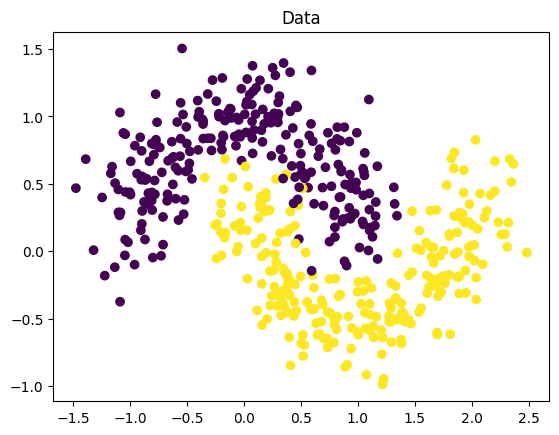

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
pyplot.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
pyplot.title('Data')
pyplot.show()

### Искусство fit-predict
Для того чтобы подобрать параметры **w** для определенных данных, используется метод **fit** у алгоритмов.

Для того чтобы получить приближенное к реальности решение задачи классификации, используется метод **predict**


10it [00:59,  5.90s/it]


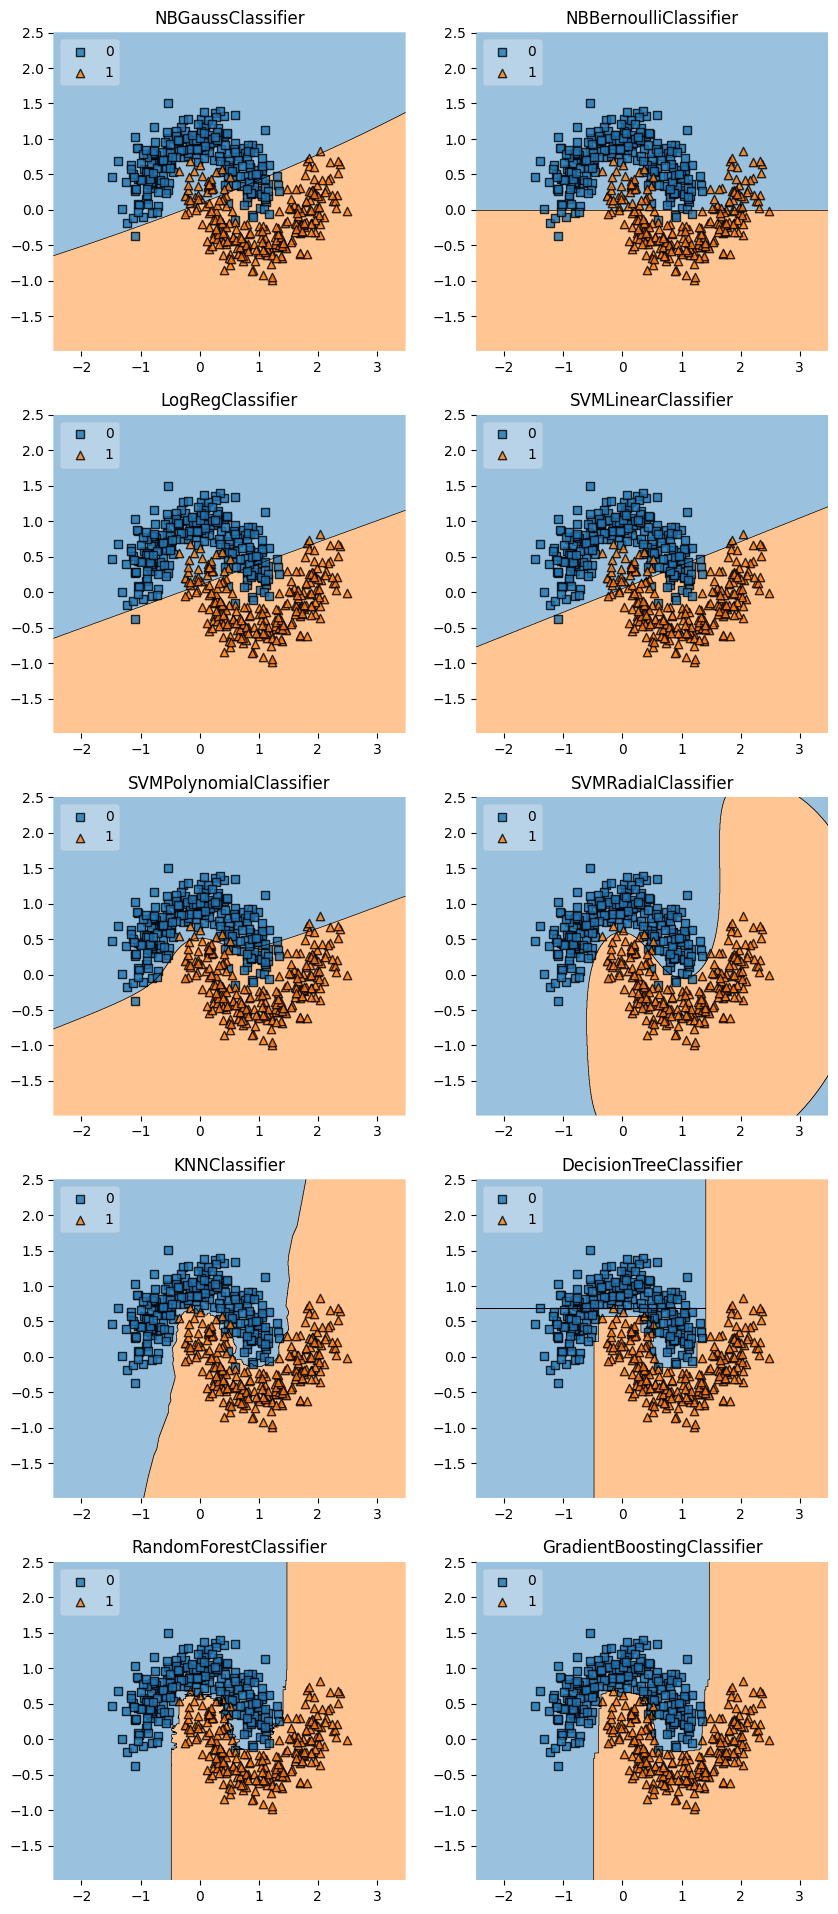

In [4]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(classifiers.__len__() // 2 + classifiers.__len__() % 2, 2)
fig = pyplot.figure(figsize=(10,24))

for i, cls in tqdm(enumerate(classifiers)):
    cls.fit(moons_points, moons_labels)
    ax = pyplot.subplot(gs[i // 2, i % 2])
    cls.plot_decisions(moons_points, moons_labels)
pyplot.show()

### Давайте теперь решим какую-нибудь задачу на применение ML в CV.
На Kaggle можно найти [датасет](https://www.kaggle.com/datasets/akhiljethwa/forest-vs-desert) с уже знакомой нам из третьей домашки задачей разделения изображений на лес и пустыню.
Давайте решим задачу на классификацию фотографии: будем присваивать изображению метки из набора ['deser', 'forest'].

Для решения этой задачи стоит сначала прочитать данные)

In [5]:
import os
from pathlib import Path
import cv2

def read_data(folder: Path, label):
    x = [cv2.cvtColor(cv2.imread(imgpath.__str__()), cv2.COLOR_BGR2RGB) for imgpath in folder.glob('*.jpg')]
    y = [label] * x.__len__()
    return x, y

datafolder = Path(os.getcwd()) / 'Data'

cls2ind = {'Desert': 0, 'Forest': 1}
ind2cls = {j: i for i, j in cls2ind.items()}

x_desert, y_desert = read_data(datafolder / 'Desert', cls2ind['Desert'])
x_forest, y_forest = read_data(datafolder / 'Forest', cls2ind['Forest'])
X = x_desert + x_forest
Y = y_desert + y_forest

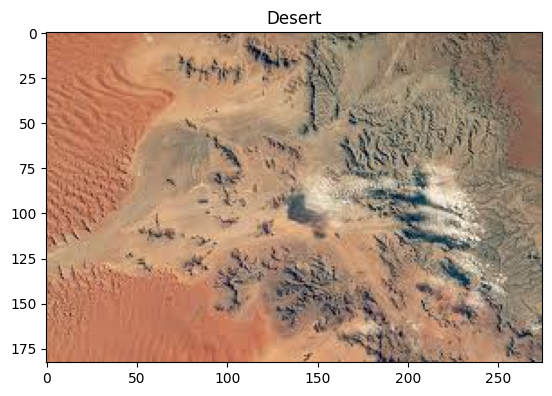

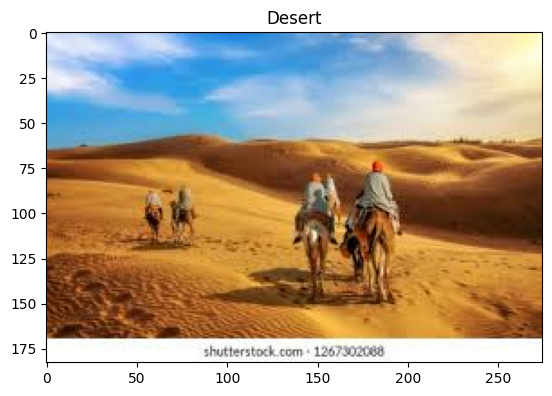

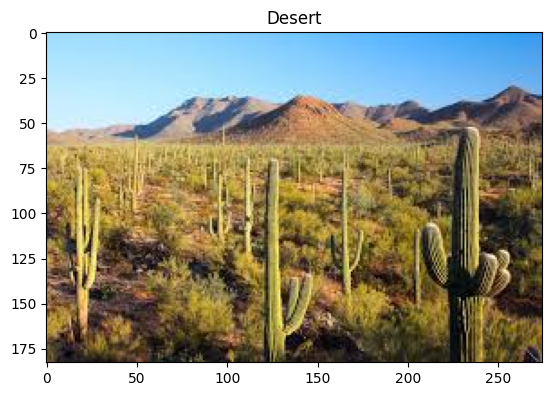

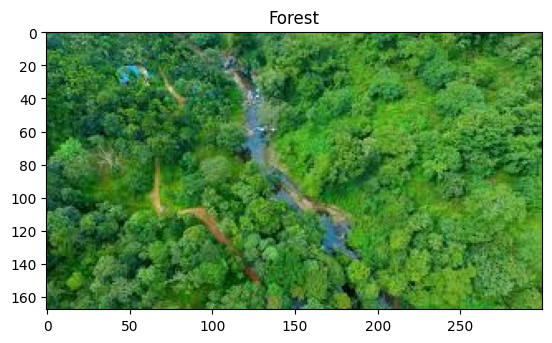

In [6]:
def show_samples(x, y, cmap=None):
    for x_, y_ in zip(x, y):
        pyplot.imshow(x_, cmap=cmap)
        pyplot.title(ind2cls[y_])
        pyplot.show()

random_samples = np.random.choice(range(X.__len__()), size=4, replace=False)
for sample in random_samples:
    show_samples([X[sample]], [Y[sample]])

### Данные прочитали. Что дальше?
Обычно, следующим действием данные разделяют на 3 выборки: обучающая (train), валидационная (val) и проверочная (test).
  - train. На обучающей выборке алгоритмы подбирают веса **w**
  - validation. При помощи валидационной выборки настраиваются алгоритмы (настройка может быть выражена, например, в выборе глубины решающего дерева)
  - train. На проверочной выборке оценивается работа финальной версии алгоритма.

Для чего это нужно? На самом деле, веса **w** подбираются так, чтобы метод максимально хорошо описывал данные, на которых он обучался. А, значит, мы можем только надеяться что полученная после обучения параметрическая функция будет обладать свойством общности - то есть хорошо выполнять свою задачу на любых данных, которые мы ей предоставим. Чтобы проверить, как хорошо функция работает, ее тестируют на проверочной выборке и считают **метрики**.

Пример хорошего разделения данных:
<div>
<img src="./img/stratification.png" alt="Image 1" width="900">
</div>

**Метрика** - это функция от полученных в результате работы алгоритма ответов и заранее известных правильных ответов.
Давайте пока что разделим данные на две выборки (третья выборка позже появится) и создадим функции метрик:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True, stratify=Y)

# Accuracy - метрика, показывающая долю угаданных ответов из всех возможных ответов
def accuracy(X, y):
    return accuracy_score(X, y)
# Precision - метрика, которая для одного выбранного класса показывает долю угаданных меток этого класса ко всем угаданным меткам
def precision_class_0(X, y):
    return precision_score(X, y, pos_label=0)
def precision_class_1(X, y):
    return precision_score(X, y, pos_label=1)
# Recall - метрика, которая для одного выбранного класса показывает долю угаданных меток этого класса ко всем меткам этого же класса
def recall_class_0(X, y):
    return recall_score(X, y, pos_label=0)
def recall_class_1(X, y):
    return recall_score(X, y, pos_label=1)

metrics = {
    accuracy,
    precision_class_0,
    precision_class_1,
    recall_class_0,
    recall_class_1,
}

### Визуализация precision и recall
<div>
<img src="./img/metrics.png" alt="Image 1" width="400">
</div>

### Подготовка входных данных - feature engineering
Теперь необходимо подготовить входные данные для алгоритмов - это действие называется препроцессингом данных. Все вышеперечисленные методы принимают в качестве входных данных набор векторов. А у нас тут изображения (то есть набор матриц). Необходимо каким-то образом перевести изображение в вектор. На данном этапе мы сталкиваемся с такой задачей как **feature engineering (генерация признаков)**. Данная задача ставится в случае когда нам нужно достать только полезную информацию из предоставленных данных. Очевидно, что, для того чтобы разделить изображения на пустыню и лес, нужно будет посчитать гистограмму цвета. Поэтому предлагается для каждого изображения посчитать гистограммы каждого цвета и конкатенировать их в один вектор. Полученный набор векторов для всех изображений и будет входными данными в алгоритмы

In [8]:
class HistTransform:
    def __init__(self):
        pass

    @staticmethod
    def transform_forward(X):
        preprocessed = []
        for x in X:
            hists = []
            for i in range(3):
                # Читаем и нормируем гистограмму
                hist_i = cv2.calcHist([x[..., i].ravel()], [0], None, [256], [0, 256]) / (x.shape[0] * x.shape[1])
                hists.append(hist_i)
            # Объединяем гистограммы
            preprocessed.append(np.concatenate(hists).squeeze())
        return np.array(preprocessed)

hist_transform = HistTransform()

In [9]:
X_train_transformed = hist_transform.transform_forward(X_train)
X_train_transformed.shape

(641, 768)

### Ритуал Датасатаниста
Хочется посмотреть на полученные данные. Однако, визуализировать пространство **R^768** слегка затруднительно.... Почему?

Поэтому мы применим трюк с уменьшением размерности при помощи SVD (Сингулярного разложения матрицы). Об этом разложении мы поговорим чуть ниже, а пока попытаемся безосновательно визуализировать данные...

(641, 641) (641, 768)
(641, 2)


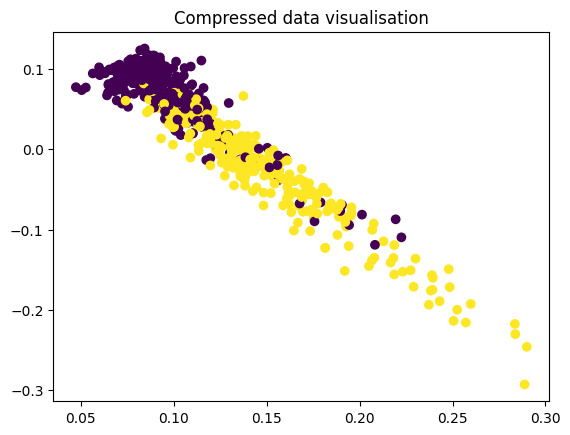

In [10]:
def compress_data(X, out_dims = 2):
    u, sigma, v_t = np.linalg.svd(X, full_matrices=False)
    print(u.shape, v_t.shape)
    return X @ v_t[:out_dims].T

to_visualie = compress_data(X_train_transformed)
print(to_visualie.shape)
pyplot.scatter(to_visualie[:, 0], to_visualie[:, 1], c=y_train)
pyplot.title('Compressed data visualisation')
pyplot.show()

По сжатым данным видно, что их кое-как (с погрешностями) можно разделить, а значит задачу с какой-то точностью точно можно решить.

### fit-predict
После подготовки данных займемся обучением алгоритмов на данных
У нас 10 классификаторов. А в конечном итоге хочется один классификатор. Для того, чтобы понять какой классификатор себя показывает лучше других, мы будем использовать метрики.

**ВАЖНО**:
- Метрики на обучающей выборке считать бесполезно - они почти наверное будут высокими, так как алгоритм учится воспроизводить эти данные (аналогия с необходимостью независимых экспертов)
- Выбирать алгоритм основываясь на метриках тестовой выборки нельзя - мы можем использовать тестовые данные только для оценки финальной версии алгоритма, а так как мы все еще выбираем финальный алгоритм, то пока тестовые данные трогать не можем
- Соответственно, тут нам поможет валидационная выборка. Перед обучением мы разделим обучающую выборку на обучающую выборку (поменьше) и валидационную. И, основываясь на метриках валидационной выборки, уже выберем конечный алгоритм для тестирования

In [11]:
import warnings

def calc_metrics(cls, y_pred, y_true):
    metric_vals = {m.__name__: m(y_pred, y_true) for m in metrics}
    print(f'Metrics for {cls.__class__.__name__}: {", ".join([f"{m_}: {val:.3f}" for m_, val in metric_vals.items()])}')
    return metric_vals

def return_best_classifier(X_train, y_train):
    # Делим обучающую выборку на обучающую выборку (поменьше) и валидационную
    X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)
    # Выберем по какой метрике будем выбирать лучший алгоритм
    reference_metric = 'accuracy'
    max_metric = 0
    best_cls = None
    for cls in classifiers:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # Обучение
            cls.fit(X_train_, y_train_)
        # Получение ответов на валидационную выборку от обученного на обучающей выборке алгоритма
        y_pred = cls.predict(X_val_)
        # Считаем метрики
        metrics = calc_metrics(cls, y_pred, y_val_)
        # Выбираем лучший алгоритм
        if metrics[reference_metric] > max_metric:
            max_metric = metrics[reference_metric]
            best_cls = cls
    return best_cls

In [12]:
cls = return_best_classifier(X_train_transformed, y_train)

Metrics for NBGaussClassifier: recall_class_0: 0.848, precision_class_0: 0.875, precision_class_1: 0.846, accuracy: 0.860, recall_class_1: 0.873
Metrics for NBBernoulliClassifier: recall_class_0: 0.971, precision_class_0: 0.516, precision_class_1: 0.985, accuracy: 0.752, recall_class_1: 0.674
Metrics for LogRegClassifier: recall_class_0: 0.846, precision_class_0: 0.859, precision_class_1: 0.846, accuracy: 0.853, recall_class_1: 0.859
Metrics for SVMLinearClassifier: recall_class_0: 0.862, precision_class_0: 0.875, precision_class_1: 0.862, accuracy: 0.868, recall_class_1: 0.875
Metrics for SVMPolynomialClassifier: recall_class_0: 0.983, precision_class_0: 0.922, precision_class_1: 0.985, accuracy: 0.953, recall_class_1: 0.928
Metrics for SVMRadialClassifier: recall_class_0: 0.984, precision_class_0: 0.953, precision_class_1: 0.985, accuracy: 0.969, recall_class_1: 0.955
Metrics for KNNClassifier: recall_class_0: 0.980, precision_class_0: 0.766, precision_class_1: 0.985, accuracy: 0.876

### Тестирование (по метрикам)
После получения лучшего алгоритма настало время предобработки тестовой выборки и подсчета на ней метрик)

In [13]:
X_test_transformed = hist_transform.transform_forward(X_test)
y_pred = cls.predict(X_test_transformed)
calc_metrics(cls, y_pred, y_test);

Metrics for SVMRadialClassifier: recall_class_0: 0.916, precision_class_0: 0.938, precision_class_1: 0.912, accuracy: 0.925, recall_class_1: 0.936


Как по метрикам понять что мы успешно справились с задачей? И при чем тут алгоритм случайного выбора класса?

### Тестирование (визуальное)
Теперь давайте убедимся воочию что алгоритм работает. Возьмем пару рандомных картинок из тестовой выборки, отрисуем их, предобработаем и выведем ответы алгоритма

In [14]:
def gather_predictions(X, cls, transformation, number_of_predictions=5, cmap=None):
    random_selection = [X[i] for i in np.random.choice(range(X.__len__()), number_of_predictions, replace=False)]
    selection_transformed = transformation.transform_forward(random_selection)
    preds = cls.predict(selection_transformed)
    for sel, pred in zip(random_selection, preds):
        pyplot.imshow(sel, cmap=cmap)
        pyplot.title(f'Prediction: {ind2cls[pred]}')
        pyplot.show()

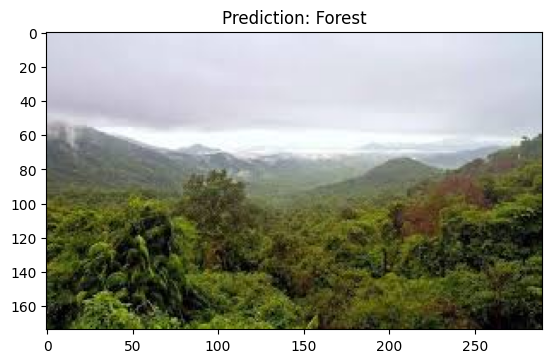

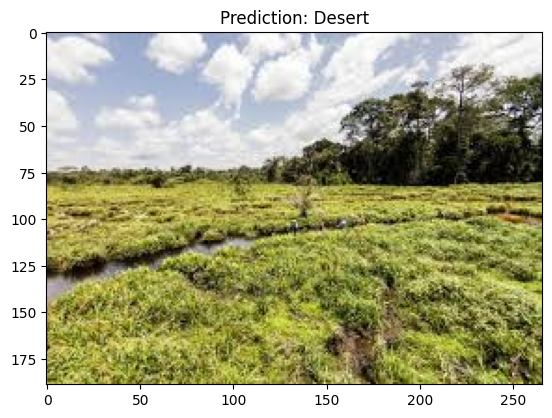

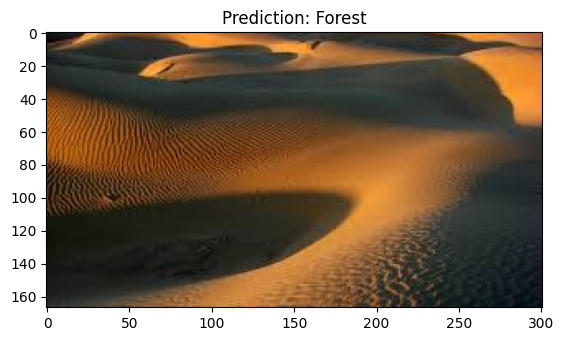

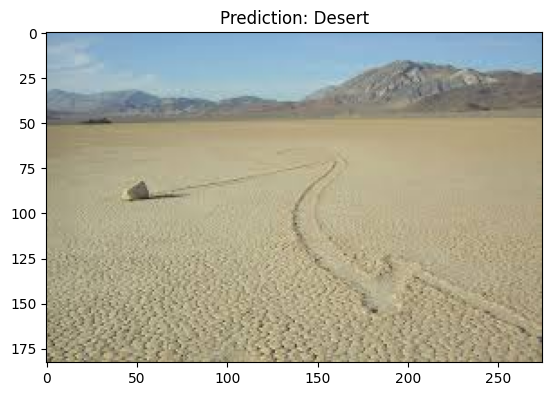

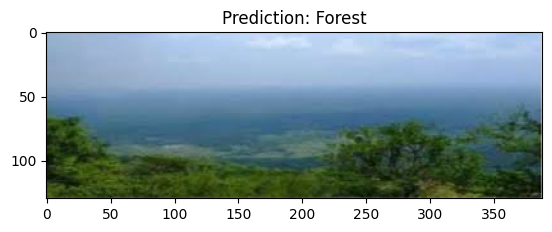

In [15]:
gather_predictions(X_test, cls, hist_transform)

### Хочется задачку посложнее...
На Kaggle можно найти [датасет](https://www.kaggle.com/datasets/aniruddha123/glasses-data) с лицами людей в очках и без.
Давайте решим задачу на классификацию фотографии человека: будем присваивать изображению метки из набора ['glasses', 'no glasses']

Сначала прочитаем данные

In [16]:
import os
from pathlib import Path
import cv2

def read_data(folder: Path, label, target_size=(150, 150)):
    x = [cv2.resize(cv2.imread(imgpath.__str__(), cv2.IMREAD_GRAYSCALE), target_size) for imgpath in folder.glob('*.jpg')]
    y = [label] * x.__len__()
    return x, y

datafolder = Path(os.getcwd()) / 'dataset'

cls2ind = {'no glasses': 0, 'glasses': 1}
ind2cls = {j: i for i, j in cls2ind.items()}

x_noglasses, y_noglasses = read_data(datafolder / 'no_glasses', cls2ind['no glasses'])
x_glasses, y_glasses = read_data(datafolder / 'glasses', cls2ind['glasses'])

X = np.array(x_glasses + x_noglasses)
Y = np.array(y_glasses + y_noglasses)

In [17]:
X.shape, Y.shape

((4920, 150, 150), (4920,))

### Посмотрим на прочитанные данные:

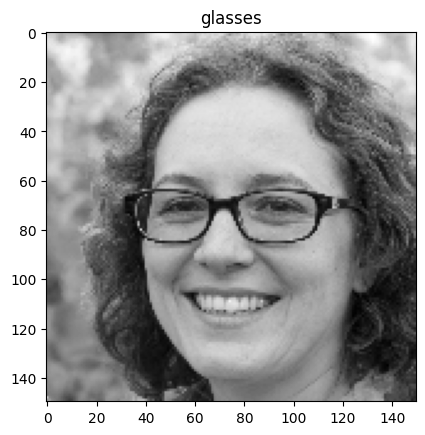

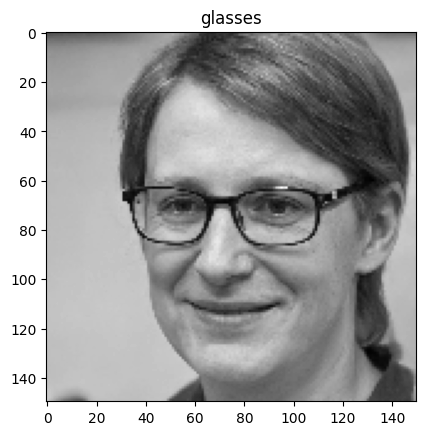

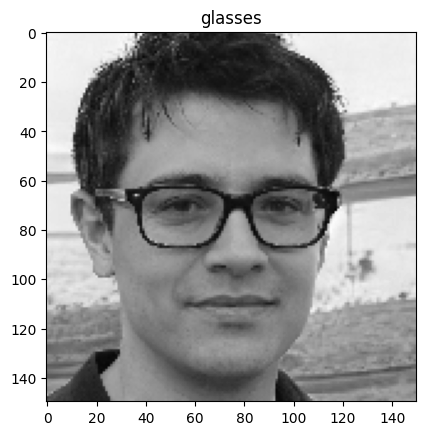

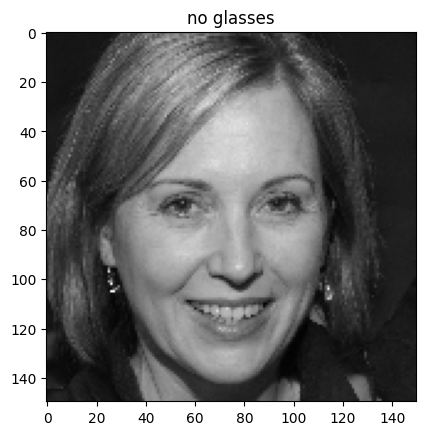

In [18]:
random_samples = np.random.choice(range(X.__len__()), size=4, replace=False)
for sample in random_samples:
    show_samples([X[sample]], [Y[sample]], cmap='gray')

### Делим все данные на обучающую и тестовую выборки

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True, stratify=Y)

### Предобработка данных
Нужно перевести изображение в вектор. Очевидный способ - это провести конкатенацию строчек пикселей изображения в один большой вектор пикселей. Но это не лучший подход, ведь тогда мы получим очень большой вектор (размером 150^2, это порядка 10^4), и потеряем информацию о взаимном расположении пикселей. Предлагается другой подход - через [SVD](https://ru.wikipedia.org/wiki/Сингулярное_разложение) (сингулярное разложение матрицы).
SVD - это разложение любой прямоугольной матрицы A в произведение трех матриц:
$$ A = U \Sigma V^T$$
U, Σ, V, где U - ортонормированный базис столбцов, Σ - диагональная матрица, состоящая из сингулярных чисел и V - ортонормированный базис строк. Из всего этого математического безобразия нам нужна только матрица V. Помимо того что V состоит за ортонормированного базиса строк, все эти вектора еще расположены в порядке убывания информации (дисперсии, энтропии). Все это нужно из-за предположения что среди базисных векторов будет такой, который отвечает за очки на человеке. И, разложив изображение по векторам, алгоритм сможет уловить различия в коэффициентах разложения изображения с очками и без.

Болтовни было много, давайте лучше перейдем к какому-то визуальному подкреплению предобработки данных при помощи SVD

In [20]:
def preprocess(X):
    # Переводим изображение в вектор и изменяем диапазон значений из [0, 255] в [0, 1]
    X = np.reshape(X, (X.__len__(), -1))
    X = X / 255.
    return X

class SVDTransform:
    def __init__(self):
        self.v_T = None

    def transform_forward(self, X, vector_count=500):
        X = preprocess(X)
        print(X.shape)
        # Базисные вектора формируются только для обучающей выборки
        if self.v_T is None:
            u, sigma, v_T = np.linalg.svd(X, full_matrices=False)
            print(u.shape, v_T.shape)
            self.v_T = v_T

        if vector_count == 'all':
            # Раскладывать изображение можно по всем векторам
            return X @ self.v_T.T
        else:
            # А можно только по части векторов (это частично относится к задаче понижения размерности)
            return X @ self.v_T.T[:, :vector_count]

    def transform_backward(self, X):
        # Также напишем обратное преобразование для демонстраций и всего такого
        return np.array([np.sum(x * self.v_T.T[:, :x.shape[0]], axis=1) for x in X])

svd_transform = SVDTransform()

### Демонстрация того что преобразование обратимое для обучающей выборки с точностью до арифметической ошибки

(3936, 22500)
(3936, 3936) (3936, 22500)


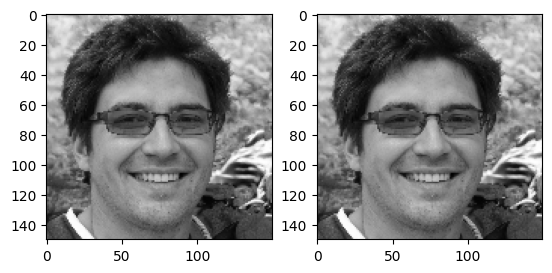

Difference: 3.143083582730956e-13


In [21]:
x_sample = X_train[0]
x_sample = x_sample / 255.
x_sample_transformed = svd_transform.transform_forward(X_train, 'all')[0]
x_sample_recovered = svd_transform.transform_backward(x_sample_transformed[None]).squeeze().reshape(150, 150)
fg, ax = pyplot.subplots(1, 2)
ax[0].imshow(x_sample, cmap='gray')
ax[1].imshow(x_sample_recovered, cmap='gray')
pyplot.show()
print(f'Difference: {np.linalg.norm(x_sample - x_sample_recovered)}')

### На данных не из обучающей выборки присутствует приемлемая погрешность

(984, 22500)


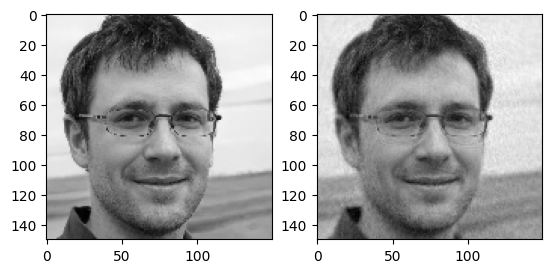

Difference:  4.860


In [22]:
x_sample = X_test[0]
x_sample = x_sample / 255.
x_sample_transformed = svd_transform.transform_forward(X_test, 'all')[0]
x_sample_recovered = svd_transform.transform_backward(x_sample_transformed[None]).squeeze().reshape(150, 150)
fg, ax = pyplot.subplots(1, 2)
ax[0].imshow(x_sample, cmap='gray')
ax[1].imshow(x_sample_recovered, cmap='gray')
pyplot.show()
print(f'Difference: {np.linalg.norm(x_sample - x_sample_recovered): .3f}')

### Демонстрация убывания количества информации в базисных векторах
Первые базисные вектора создают общую картину, последние - добавляют только небольшие детали

(3936, 22500)


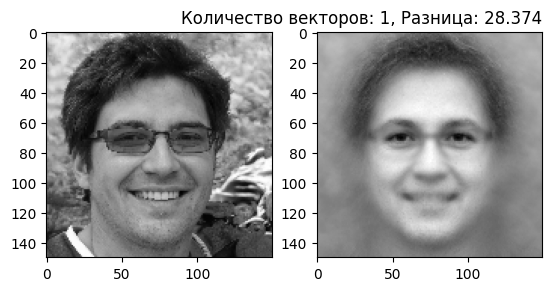

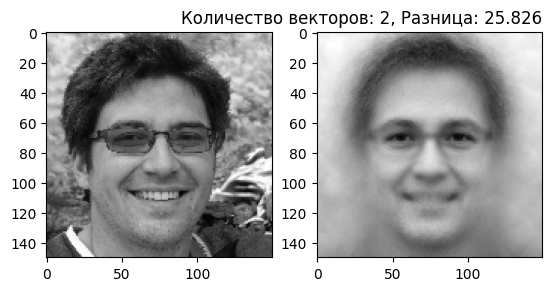

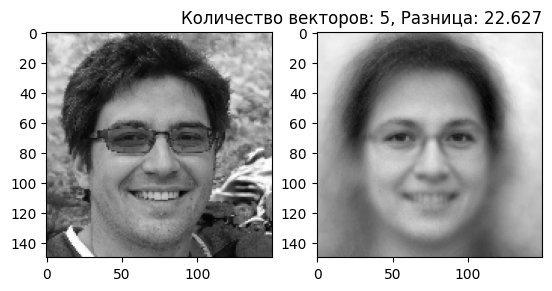

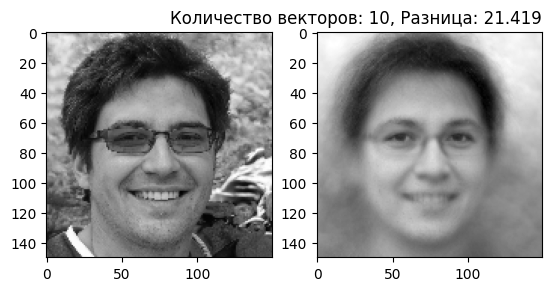

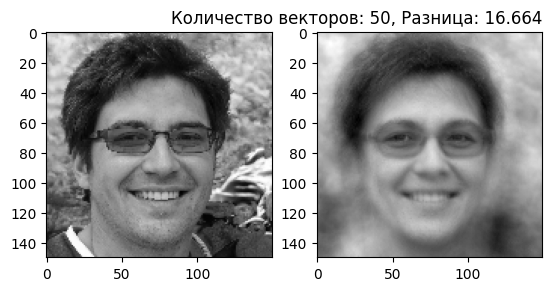

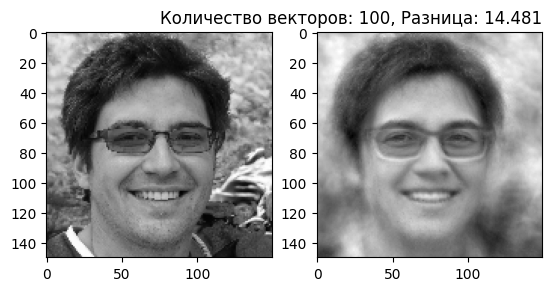

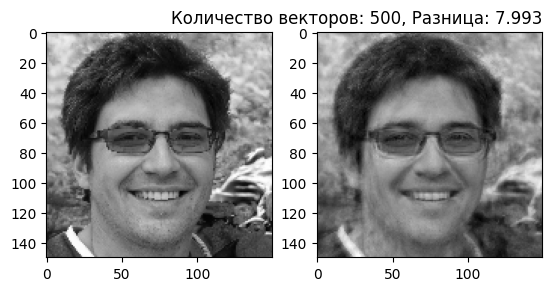

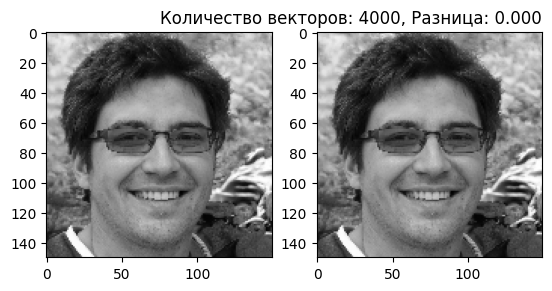

In [23]:
x_sample = X_train[0]
x_sample = x_sample / 255.
x_sample_transformed = svd_transform.transform_forward(X_train, 'all')[0]

for vecs in [1, 2, 5, 10, 50, 100, 500, 4000]:
    x_sample_recovered = svd_transform.transform_backward(x_sample_transformed[None, :vecs]).squeeze().reshape(150, 150)
    fg, ax = pyplot.subplots(1, 2)
    ax[0].imshow(x_sample, cmap='gray')
    ax[1].imshow(x_sample_recovered, cmap='gray')
    pyplot.title(f'Количество векторов: {vecs}, Разница: {np.linalg.norm(x_sample - x_sample_recovered):.3f}', loc='right')
    pyplot.show()

### Посмотрим на несколько первых базисных векторов

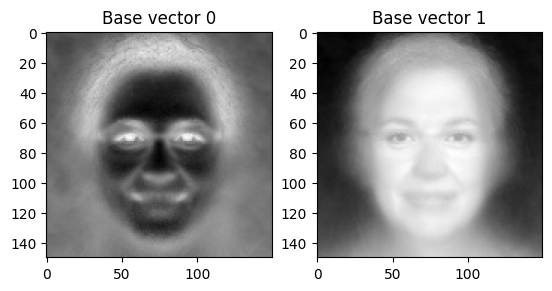

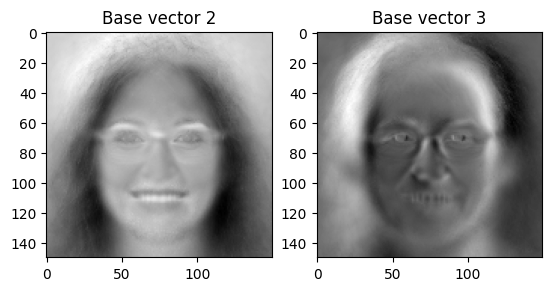

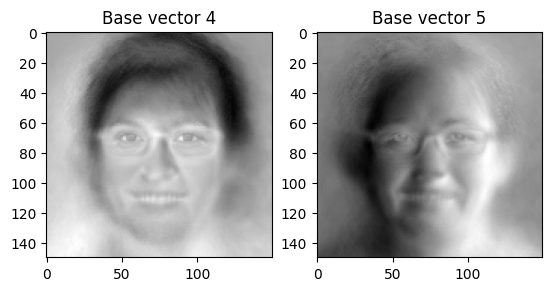

In [24]:
amount = 6
vecs = svd_transform.v_T[:amount]
for i in range(0, amount, 2):
    fg, ax = pyplot.subplots(1, 2)
    ax[0].imshow(vecs[i].reshape(150, 150), cmap='gray')
    ax[1].imshow(vecs[i+1].reshape(150, 150), cmap='gray')
    ax[0].set_title(f'Base vector {i}')
    ax[1].set_title(f'Base vector {i+1}')
    pyplot.show()

### Сделаем предположение, что 500 первых базисных векторов достаточно
Тогда предобработка данных будет заключаться в получении 500 коэффициентов разложения по базисным векторам

In [25]:
X_train_transformed = svd_transform.transform_forward(X_train, 500)
X_train_transformed.shape

(3936, 22500)


(3936, 500)

### Обучение и выбор лучшего классификатора

In [27]:
cls = return_best_classifier(X_train_transformed, y_train)

Metrics for NBGaussClassifier: recall_class_0: 0.661, precision_class_0: 0.751, precision_class_1: 0.700, accuracy: 0.722, recall_class_1: 0.783
Metrics for NBBernoulliClassifier: recall_class_0: 0.835, precision_class_0: 0.852, precision_class_1: 0.869, accuracy: 0.862, recall_class_1: 0.883
Metrics for LogRegClassifier: recall_class_0: 0.972, precision_class_0: 1.000, precision_class_1: 0.977, accuracy: 0.987, recall_class_1: 1.000
Metrics for SVMLinearClassifier: recall_class_0: 0.958, precision_class_0: 1.000, precision_class_1: 0.966, accuracy: 0.981, recall_class_1: 1.000
Metrics for SVMPolynomialClassifier: recall_class_0: 0.945, precision_class_0: 0.991, precision_class_1: 0.955, accuracy: 0.971, recall_class_1: 0.993
Metrics for SVMRadialClassifier: recall_class_0: 0.950, precision_class_0: 0.988, precision_class_1: 0.959, accuracy: 0.972, recall_class_1: 0.991
Metrics for KNNClassifier: recall_class_0: 0.825, precision_class_0: 0.670, precision_class_1: 0.889, accuracy: 0.793

### Тестирование (по метрикам)
После получения лучшего алгоритма настало время предобработки тестовой выборки и подсчета на ней метрик)

In [28]:
X_test_transformed = svd_transform.transform_forward(X_test, 500)
y_pred = cls.predict(X_test_transformed)
calc_metrics(cls, y_pred, y_test);

(984, 22500)
Metrics for LogRegClassifier: recall_class_0: 0.971, precision_class_0: 0.998, precision_class_1: 0.977, accuracy: 0.986, recall_class_1: 0.998


### Тестирование (визуальное)
Теперь давайте убедимся воочию что алгоритм работает. Возьмем пару рандомных картинок из тестовой выборки, отрисуем их, предобработаем и выведем ответы алгоритма

(5, 22500)


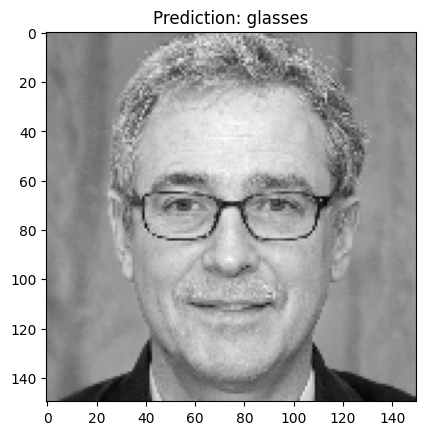

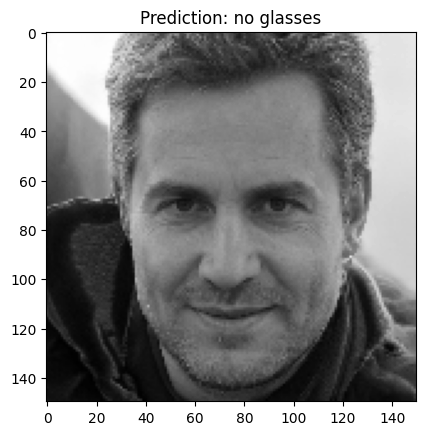

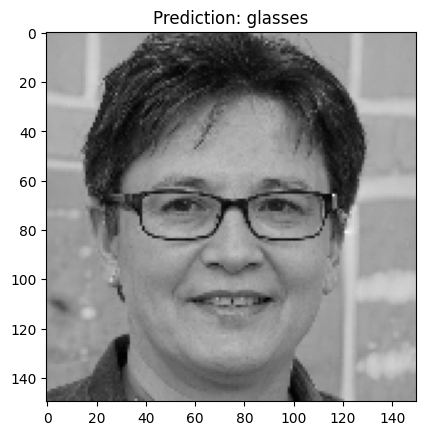

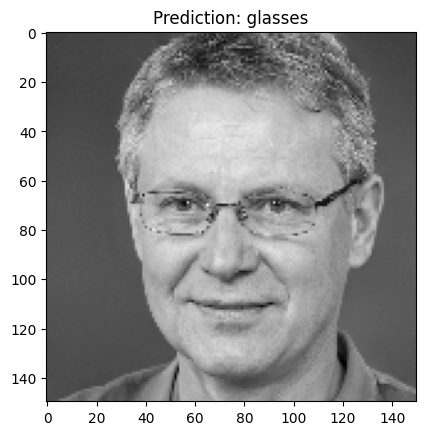

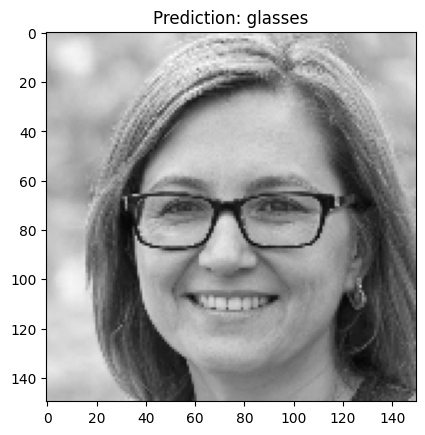

In [29]:
gather_predictions(X_test, cls, svd_transform, cmap='gray')